In [1]:
import pickle

import numpy as np
from scipy.stats import qmc
from scipy.special import eval_legendre

import rose

from benchmark import BenchmarkData

In [2]:
sampler = qmc.LatinHypercube(2)
n_samples = 50
sample = sampler.random(n_samples)

In [3]:
lower_bounds = [100, -200]
upper_bounds = [300, 0]

parameter_samples = qmc.scale(sample, lower_bounds, upper_bounds)

In [4]:
se = rose.SchroedingerEquation(rose.MN_Potential)

In [6]:
energy = 50 # MeV
k = np.sqrt(2*rose.MN_Potential.mu*energy/rose.constants.HBARC)
r0s = np.linspace(10.0, 20.0, 11)

phase_shifts = np.array(
    [[se.delta(energy, theta, np.array([k*1e-6, k*30]), 0, s_0=k*r0) for r0 in r0s] for theta in parameter_samples]
)

sigma = np.std(phase_shifts, axis=1)
mu = np.median(phase_shifts, axis=1)
spread = np.abs(np.max(sigma/mu))
print(spread)

3.318575203047959e-08


In [7]:
benchmark_data = [BenchmarkData(se, energy, theta) for theta in parameter_samples]


In [8]:
filename = f'benchmark_data_MN_Potential_E_{energy:.2f}_MeV.pkl'
with open(filename, 'wb') as f:
    pickle.dump(benchmark_data, f, pickle.HIGHEST_PROTOCOL)

In [9]:
with open(filename, 'rb') as f:
    bd = pickle.load(f)

In [10]:
import matplotlib.pyplot as plt

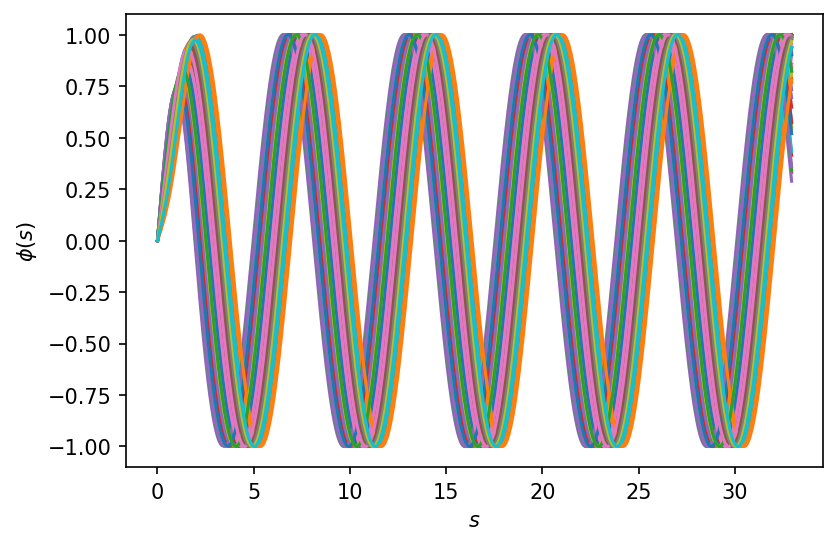

In [12]:
fig, ax = plt.subplots(dpi=150)
fig.patch.set_facecolor('white')

for d in bd:
    ax.plot(d.s, d.phi)

ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$\phi(s)$');

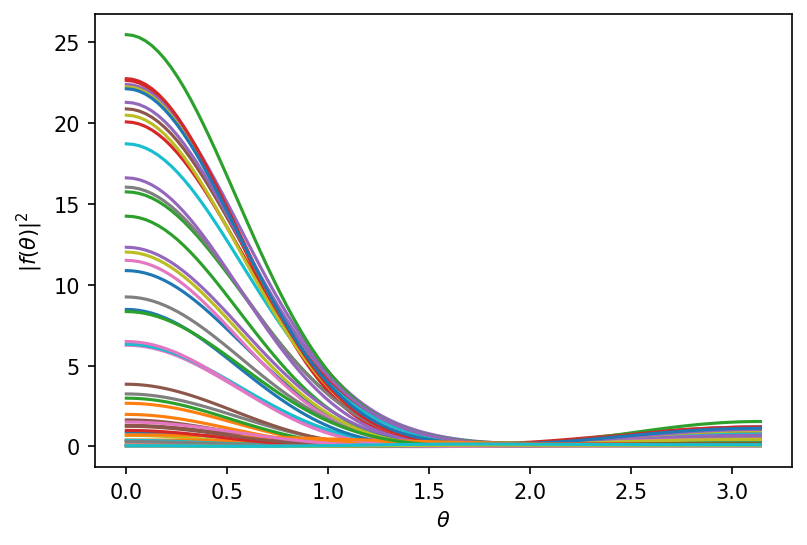

In [13]:
fig, ax = plt.subplots(dpi=150)
fig.patch.set_facecolor('white')

for d in bd:
    f = d.scattering_amplitude
    ax.plot(np.arccos(d.costheta), np.real(f*np.conj(f)))

ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$|f(\theta)|^2$');